# Lab Customer Analysis Case Study

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

## Load files and store data in variable

### Have a look at the data to get an overview

In [2]:
# load data and store in variable
file1 = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv", index_col=False)
#file2 = pd.read_csv("Data/file2.csv")
#file3 = pd.read_csv("Data/file3.csv")
file1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## Define functions to clean column labels before concating
 - all lower case
 - replace space with underscore

In [3]:
# create functions to rename and sort columns
# make columns lower case
def make_columns_lower_case(df):
    #df.columns=[i.lower() for i in df.columns]
    df.columns = df.columns.str.lower()
    return df

# replace space " " with underscore "_"
def replace_space(df):
    df.columns=[i.replace(" ","_") for i in df.columns]
    return df

# lower and replace space
def columns_lower_no_space(df):
    """ 
    Info: Columns of DataFrame will be manipulated: 
            1. All letters will be lowered.
            2. Spaces " " will be replaced with underscores "_"
    """
    make_columns_lower_case(df)
    replace_space(df)
    return df

### Apply function on loaded files
### Have a look at the column labels

In [4]:
# modify column: lower letters and replace space and delete index column
file1 = columns_lower_no_space(file1).drop(columns={"unnamed:_0"})
# file2 = columns_lower_no_space(file2)
# file3 = columns_lower_no_space(file3)

# compare the columns
pd.DataFrame([file1.columns])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


## Concat data to one dataframe
### show info

In [5]:
df = pd.concat([file1],ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

## Calculate percentage of NaN values and zero values in columns

## ToDo: add columns for: type, No of categories, range, count, unique

In [6]:
# calculate percentage of NaN values and zero values in columns
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
customer,0.00,0.00
state,5.78,0.00
customer_lifetime_value,0.00,0.00
response,5.78,0.00
coverage,0.00,0.00
education,0.00,0.00
effective_to_date,0.00,0.00
employmentstatus,0.00,0.00
gender,0.00,0.00
income,0.00,25.55


## Start cleaning Data - start with "nobrainers"
### Drop empty lines (all nan)
### Drop unnessesary columns

### ToDo: add a function to drop lines with more than % empty

In [7]:
df = df.dropna(how="all")
df = df.reset_index().drop(columns={"index"})
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## Clean data of individual columns
### Clean custome lifetime value:
- create function 
    - identify "%".
    - strip %
    - make float/numeric
    - divide by 100
- imply function on column customer_lifetime_value

In [8]:
# create function to identify and strip %. turn to float/numeric and divide by 100
def clean_percentage(number):
    if type(number) in [float,int]:
        return number
    else:
        if "%" in number:
            return pd.to_numeric(number.rstrip("%"))/100
        else: 
            try:
                return pd.to_numeric(number)
            except ValueError:
                return number

# test function
# list(map(clean_percentage,[100,200.0,"300","400%","sdf"]))

In [9]:
## apply clean_percentage on customer_lifetime_value

df["customer_lifetime_value"] = list(map(clean_percentage, df["customer_lifetime_value"]))

### Clean data of column customer
#### Have a look at customer values
- show count and unique
- show duplicates

In [10]:
df.customer.describe()

count       10910
unique       9134
top       ID89933
freq            7
Name: customer, dtype: object

### Create function to show duplicates

### ToDo: apply 2nd sort: index

In [11]:
def compare_duplicates( df = df, column = None  , amount = 10):
    ''' 
    compare_duplicates( DataFrame = df, column = none, amount = 10)
    
    column:     column to check for duplicated, if None > check all columns
    amount:     show first first amount of rows
    '''

    try:
        return df.loc[df.duplicated(subset=column, keep=False)].sort_values(by=column).head(amount)
    except KeyError:
        print("No duplicates")

### Compare duplicates in column customer
- same data?
- which one to keep? (last,first,none,all?)
- compare values in other columns to see inconsequent values or value pattern

In [12]:
compare_duplicates(df, "customer", 10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
8731,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,...,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
10376,AA10041,California,7901.744238,No,Basic,High School or Below,2/2/11,Unemployed,M,0,...,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,NaN,NaN,A
3960,AA10041,NaN,7901.744238,NaN,Basic,High School or Below,2/2/11,Unemployed,M,0,...,0.0,5,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize,A
432,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,...,NaN,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,NaN
6044,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167,...,3.0,1,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize,A
5078,AA56476,Arizona,5595.389905,Yes,Basic,High School or Below,2/5/11,Employed,F,74454,...,0.0,3,Corporate Auto,Corporate L2,Offer2,Call Center,340.800000,Four-Door Car,Medsize,A
10422,AA56476,Arizona,5595.389905,Yes,Basic,High School or Below,2/5/11,Employed,F,74454,...,NaN,3,Corporate Auto,Corporate L2,Offer2,Call Center,340.800000,Four-Door Car,Medsize,NaN
4601,AA71604,Arizona,11986.592120,No,Extended,Master,1/17/11,Employed,F,87560,...,1.0,2,Personal Auto,Personal L2,Offer1,Web,470.400000,NaN,NaN,A
5435,AA71604,Arizona,11986.592120,No,Extended,Master,1/17/11,Employed,F,87560,...,1.0,2,Personal Auto,Personal L2,Offer1,Web,470.400000,Two-Door Car,Medsize,NaN
6360,AB21519,California,3861.486269,Yes,Extended,College,1/6/11,Employed,F,93272,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,281.110788,Four-Door Car,Medsize,NaN


### Analyse duplicates
- customer duplicates are almost the same
- second duplicate is cleaner than the first.
- keep second
- How to correct "Number of open complaints":
    - 1/0/00 => 0
    - 1/1/00 => 1
    - 1/3/00 => 3
    - etc.


In [13]:
## Show how many NAN in column customer:
df[df["customer"].isna()== True]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


### Drop duplicates (based on customer column) and keep last

In [14]:
## As there are  no nan-values we can
## Drop customer duplicates and keep last:
df = df.drop_duplicates(subset = "customer", keep="last")
df.customer.describe()

count        9134
unique       9134
top       KX64629
freq            1
Name: customer, dtype: object

### Drop column customer

In [15]:
## we get rid of column "customer"
#df["columns"] = 
df = df.drop(["customer"], axis=1).reset_index(drop=True)
df#.head(1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
1,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
2,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
3,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
4,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,Urban,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
9130,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
9131,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
9132,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## Clean number of open complaints
### check count of unique values

In [16]:
# check count of unique values
df.number_of_open_complaints.value_counts()

0.0    7026
1.0     981
2.0     366
3.0     281
4.0     144
5.0      53
Name: number_of_open_complaints, dtype: int64

In [17]:
## replace value with value in positon 2 of str modified to int
df.loc[:,"number_of_open_complaints"] = list(map(lambda x: int(x[2]) if (type(x) == str and len(x)>2) else x, df.loc[:,"number_of_open_complaints"]))

In [18]:
# check values after function
df.number_of_open_complaints.value_counts()

0.0    7026
1.0     981
2.0     366
3.0     281
4.0     144
5.0      53
Name: number_of_open_complaints, dtype: int64

## Filtering data and Correcting typos 
### Filter the data in state and gender column to standardize the texts in those columns

#### Clean Gender Column


In [19]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [20]:
# check gender values
df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

### Function to rename gender names

### ToDo: put function in "basic"-rename function with predefined dic or like following

In [21]:
# def function to rename values

def rename_gender_values(x):
    if type(x) == str:
        if x[0] in ["F","f"]:
            return "F"
        elif x[0] in ["m","M"]:
            return "M"
        else:
            return "U"
    else:
        return "U"
# Test function
#list(map(rename_gender_values, ["F","femle","mal","M",1,"sokl"]))

In [22]:
df.gender = df.gender.apply(rename_gender_values)
df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

### Clean state column

In [23]:
## check state values
df.state.unique()

array(['California', 'Washington', 'Oregon', 'Arizona', 'Nevada', nan],
      dtype=object)

In [24]:
df.state.value_counts()

California    3059
Oregon        2524
Arizona       1656
Nevada         857
Washington     775
Name: state, dtype: int64

In [25]:
# def function to rename values
def rename_state_values( x , dict ):
    """ 
    rename_state_values( x , dict ):
        x:  argument to test/rename
        dict: argument to compared to
            - keys of dict are valiable values
            - values of dict are likely missspelled strings
    Example:
        replace_state_dic = {'Washington' : ['WA'], 'Arizona' : ['AZ','Ariznoa']}
        list(map(lambda x: rename_state_values(x,replace_state_dic), ["WA","Arizona","AZ","Arinoa"]))

        Output:
        ['Washington', 'Arizona', 'Arizona', None]

    Example to use on df:
    replace_state_dic = {'Washington' : ['WA',"W"], 'Arizona' : ["AZ","Ari"] , 'Nevada' : [] , 'California': ["cali","CA","Cali"] , 'Oregon' : []}
    df.state = list(map(lambda x: rename_state_values(x,replace_state_dic), df.state))

    Value_counts:
    before: California    3030
            Oregon        2601
            Arizona       1629
            Nevada         882
            Washington     690
            Cali           120
            AZ              74
            WA              30

    after:  California    3150
            Oregon        2601
            Arizona       1703
            Nevada         882
            Washington     720
    """
    if x in dict.keys():
        return x
    for key, list_substitutes in dict.items():
        if x in list_substitutes:
            return key
    return

In [26]:
# Test function
#list(map(lambda x: rename_state_values(x,replace_state_dic), ["Cali","WA","Arizona","California","Cali","AZ","W","Ari","AZ","Cali",1,"sokl","Cali"]))

In [27]:
# create Dic with valiable values for state as keys and and likely missspelled values as a list of values
replace_state_dic = {'Washington' : ['WA',"W"], 'Arizona' : ["AZ","Ari"] , 'Nevada' : [] , 'California': ["cali","CA","Cali"] , 'Oregon' : []}

# use rename funcion on df.state
df.state = list(map(lambda x: rename_state_values(x,replace_state_dic), df.state))
df.state.value_counts()

California    3059
Oregon        2524
Arizona       1656
Nevada         857
Washington     775
Name: state, dtype: int64

## Replacing null values
### Replace missing values with means of the column (for numerical columns)

### Overview of Nullvalues and NaN:

In [28]:
# calculate percentage of NaN values and zero values in columns
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
state,2.88,0.00
customer_lifetime_value,0.00,0.00
response,2.88,0.00
coverage,0.00,0.00
education,0.00,0.00
effective_to_date,0.00,0.00
employmentstatus,0.00,0.00
gender,0.00,0.00
income,0.00,25.37
location_code,0.00,0.00


### Eliminate 0-values in income with calculated mean

In [29]:
# have a look at income values
df.income.value_counts()
#df.income

0        2317
95697      12
27972       7
26876       7
24910       7
         ... 
23811       1
35289       1
54780       1
93246       1
64195       1
Name: income, Length: 5694, dtype: int64

### Calculate mean of income but ignore 0
### ToDO: use variable instead of manually put in 0-count

In [31]:
# calculate mean of income without zero
mean_income_no_zero = df.income.sum()/(df.income.fillna(0).astype(bool).sum()) # entered count of zeros manually
mean_income_no_zero

50456.58046061317

In [ ]:
# mean with zeros for comparison
df.income.mean()

37657.38000875848

In [ ]:
# replace 0.0-values with mean_income_no_zero
#df.income = list(map(lambda x: mean_income_no_zero if x == 0.0 else x, df.income))

In [ ]:
# Instead of filling in mean replace 0 with last valiable value
df.income = df.income.replace(to_replace=0, method='bfill').replace(to_replace=0, method='ffill')

### Replace NaN values in column customer_lifetime_value

### ToDo: check if mean() and mean without NaN is the same

In [ ]:
df.customer_lifetime_value.isna().sum()

0

In [ ]:
# have a look at customer_lifetime_value values
# df.customer_lifetime_value.value_counts()
#df.isna().sum().loc["customer_lifetime_value"]
df.customer_lifetime_value

0        2228.525238
1       14947.917300
2       22332.439460
3        5035.035257
4        4956.247235
            ...     
9129    15563.369440
9130     5259.444853
9131    23893.304100
9132    11971.977650
9133     6857.519928
Name: customer_lifetime_value, Length: 9134, dtype: float64

In [ ]:
# calculate mean of "customer_lifetime_value" without zero
mean_customer_lifetime_value_no_zero = (df
                                                .customer_lifetime_value
                                                .sum()
                                            /(len(df.
                                                    customer_lifetime_value)
                                        -(df
                                            .isna()
                                            .sum()
                                            .loc["customer_lifetime_value"])))
mean_customer_lifetime_value_no_zero

8004.940474987081

In [ ]:
df.customer_lifetime_value.mean()

8004.940474987084

In [ ]:
df.customer_lifetime_value = df.customer_lifetime_value.fillna(mean_customer_lifetime_value_no_zero) # check if mean by function is same as manually calculated for poplation incl. NaN

In [ ]:
# have a look at customer_lifetime_value values
# df.customer_lifetime_value.value_counts()
#df.isna().sum().loc["customer_lifetime_value"]
df.customer_lifetime_value

0        2228.525238
1       14947.917300
2       22332.439460
3        5035.035257
4        4956.247235
            ...     
9129    15563.369440
9130     5259.444853
9131    23893.304100
9132    11971.977650
9133     6857.519928
Name: customer_lifetime_value, Length: 9134, dtype: float64

In [ ]:
## drop columns with less values
df = df.drop(columns={'vehicle_type'})

In [ ]:
## drop rows with no state and response
df = df.dropna(how="any")
df = df.reset_index().drop(columns={"index"})
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,22139,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
1,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
2,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
3,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
4,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,Urban,...,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
8351,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,61146,Suburban,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
8352,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
8353,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [ ]:
# check NaN and 0.0 again
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
state,0.0,0.00
customer_lifetime_value,0.0,0.00
response,0.0,0.00
coverage,0.0,0.00
education,0.0,0.00
effective_to_date,0.0,0.00
employmentstatus,0.0,0.00
gender,0.0,0.00
income,0.0,0.00
location_code,0.0,0.00


# Activity 2

## Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

### create function to rename values. Use dataframe as input and a dict as a renaming advice

In [ ]:
# def function to rename values
def rename_values( x , dict ):
    """ 
    rename_values( x , dict ):
        x:  argument to test/rename
        dict: argument to compared to
            - keys of dict are valiable values
            - values of dict are likely missspelled strings
    Example:
        replace_state_dic = {'Washington' : ['WA'], 'Arizona' : ['AZ','Ariznoa']}
        list(map(lambda x: rename_state_values(x,replace_state_dic), ["WA","Arizona","AZ","Arinoa"]))

        Output:
        ['Washington', 'Arizona', 'Arizona', None]

    Example to use on df:
    replace_state_dic = {'Washington' : ['WA',"W"], 'Arizona' : ["AZ","Ari"] , 'Nevada' : [] , 'California': ["cali","CA","Cali"] , 'Oregon' : []}
    df.state = list(map(lambda x: rename_state_values(x,replace_state_dic), df.state))

    Value_counts:
    before: California    3030
            Oregon        2601
            Arizona       1629
            Nevada         882
            Washington     690
            Cali           120
            AZ              74
            WA              30

    after:  California    3150
            Oregon        2601
            Arizona       1703
            Nevada         882
            Washington     720
    """
    if x in dict.keys():
        return x
    for key, list_substitutes in dict.items():
        if x in list_substitutes:
            return key
    return

In [ ]:
# Test function
#list(map(lambda x: rename_state_values(x,replace_state_dic), ["Cali","WA","Arizona","California","Cali","AZ","W","Ari","AZ","Cali",1,"sokl","Cali"]))

In [ ]:
# create Dic with valiable values for state as keys and and likely missspelled values as a list of values
replace_state_region_dic = {'West Region' : ["California"], 'North West' : ["Oregon"] , 'East' : ["Washington"] , 'Central': ["Nevada","Arizona"] }

# use rename funcion on df.state
df["region"] = list(map(lambda x: rename_values(x,replace_state_region_dic), df.state))
# df.region.value_counts()
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region
0,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,22139,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,West Region
1,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,East
2,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,North West
3,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,West Region
4,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,Urban,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,West Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,Central
8351,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,61146,Suburban,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,Central
8352,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,North West
8353,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Central


## Standardizing the data – Use string functions to standardize the text data (lower case)

In [ ]:
## checking values of policy type
df.policy_type.value_counts()

### Data looks clean only need for lower case

Personal Auto     6203
Corporate Auto    1808
Special Auto       344
Name: policy_type, dtype: int64

In [ ]:
# make all string lower case
df = df.applymap(lambda x: x if type(x)!=str else x.lower())

In [5]:
#list(df.columns)

True

In [ ]:
##which columns are numeric/object?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          8355 non-null   object 
 1   customer_lifetime_value        8355 non-null   float64
 2   response                       8355 non-null   object 
 3   coverage                       8355 non-null   object 
 4   education                      8355 non-null   object 
 5   effective_to_date              8355 non-null   object 
 6   employmentstatus               8355 non-null   object 
 7   gender                         8355 non-null   object 
 8   income                         8355 non-null   int64  
 9   location_code                  8355 non-null   object 
 10  marital_status                 8355 non-null   object 
 11  monthly_premium_auto           8355 non-null   int64  
 12  months_since_last_claim        8355 non-null   f

### Table with numeric data

In [ ]:
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2228.525238,22139,64,3.0,26,0.0,1,744.924331
1,14947.917300,22139,100,34.0,31,0.0,2,480.000000
2,22332.439460,49078,97,10.0,3,0.0,2,484.013411
3,5035.035257,37405,63,8.0,99,3.0,4,287.556107
4,4956.247235,87197,63,35.0,45,0.0,3,247.402353
...,...,...,...,...,...,...,...,...
8350,2771.663013,59855,74,30.0,82,4.0,1,355.200000
8351,19228.463620,61146,187,14.0,32,0.0,2,897.600000
8352,5259.444853,61146,65,7.0,68,0.0,6,273.018929
8353,23893.304100,39837,201,11.0,63,0.0,2,381.306996


### Activity 4

- Show a plot of the total number of responses.


In [ ]:
number_responses = df.response.value_counts()
number_responses

no     7159
yes    1196
Name: response, dtype: int64

Text(0.5, 1.0, 'Total number of responses')

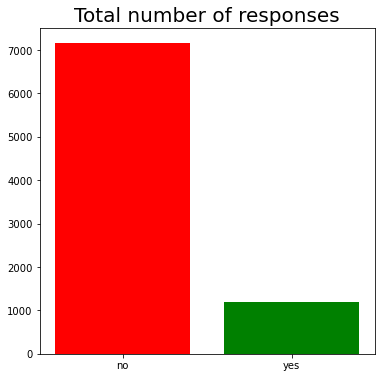

In [ ]:
# Create bars
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.bar(number_responses.index, number_responses, color=("red","green"))
ax.set_title("Total number of responses",{"fontsize":20})
#ax.xaxis.set(ticks=[0,1], ticklabels=["died","survived"])
#ax.tick_params(axis='y', direction = "inout",length=10)

- Show a plot of the response rate by the sales channel.


In [ ]:
df.response.value_counts(normalize=True)

no     0.856852
yes    0.143148
Name: response, dtype: float64

In [ ]:
response_rate = df.groupby(["sales_channel","response"])["response"].count().rename("response_rate")
res_rate_by_channel = response_rate / response_rate.groupby(level=0).sum() * 100
res_rate_by_channel

sales_channel  response
agent          no          81.000000
               yes         19.000000
branch         no          88.495575
               yes         11.504425
call center    no          89.189189
               yes         10.810811
web            no          87.993283
               yes         12.006717
Name: response_rate, dtype: float64

In [ ]:
df.groupby("sales_channel").agg({"response": "value_counts" }).reset_index

<bound method DataFrame.reset_index of                         response
sales_channel response          
agent         no            2592
              yes            608
branch        no            2100
              yes            273
call center   no            1419
              yes            172
web           no            1048
              yes            143>

In [ ]:
channel_response = df.groupby(["sales_channel"])["response"].value_counts(normalize=True)
df_channel_response = pd.DataFrame({"channel_response_rate":channel_response}).reset_index()
df_channel_response = df_channel_response[df_channel_response["response"]=="yes"]
df_channel_response

,sales_channel,response,channel_response_rate
1,agent,yes,0.190000
3,branch,yes,0.115044
5,call center,yes,0.108108
7,web,yes,0.120067


Text(0.5, 1.0, 'Reponserate of channels [%]')

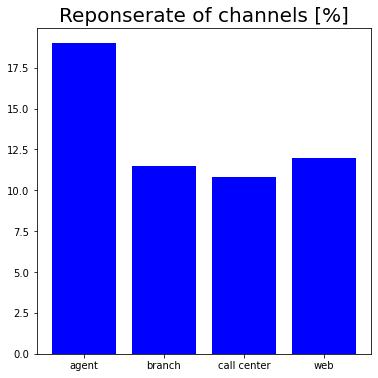

In [ ]:
# Create bars
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.bar(df_channel_response.sales_channel, df_channel_response.channel_response_rate*100, color=("blue"))
ax.set_title("Reponserate of channels [%]",{"fontsize":20})
#ax.xaxis.set(ticks=[0,1], ticklabels=["died","survived"])
#ax.tick_params(axis='y', direction = "inout",length=10)

In [ ]:
channel_response = df.groupby(["sales_channel"])["response"].value_counts(normalize=True)
df_channel_response = pd.DataFrame({"channel_response_rate":channel_response}).reset_index()
df_channel_response
#students_df.groupby("student_age").ag  g({"student_name" : "count","pyscore": lambda x: np.mean(x)}).reset_index()

,sales_channel,response,channel_response_rate
0,agent,no,0.810000
1,agent,yes,0.190000
2,branch,no,0.884956
3,branch,yes,0.115044
4,call center,no,0.891892
5,call center,yes,0.108108
6,web,no,0.879933
7,web,yes,0.120067


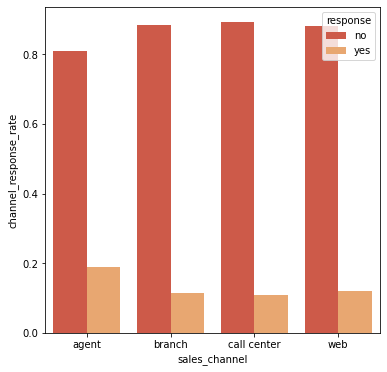

In [ ]:
sns.set_palette("RdYlGn")
fig.ax = plt.subplots(figsize = (6,6))
sns.barplot(x="sales_channel", y="channel_response_rate", data=df_channel_response, hue="response")#, hue = response_rate["response"])
ax.set_title("Response rate by sales channel")
plt.show()

- Show a plot of the response rate by the total claim amount.


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

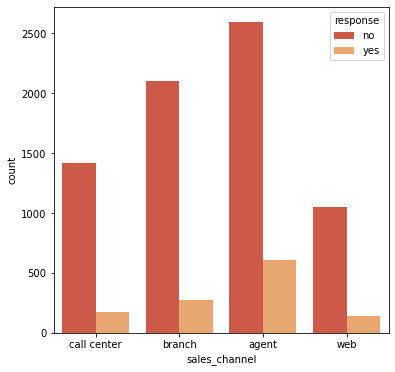

In [ ]:
sns.set_palette("RdYlGn")
fig.ax = plt.subplots(figsize = (6,6))
sns.countplot(x="sales_channel", data=df, hue="response")

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

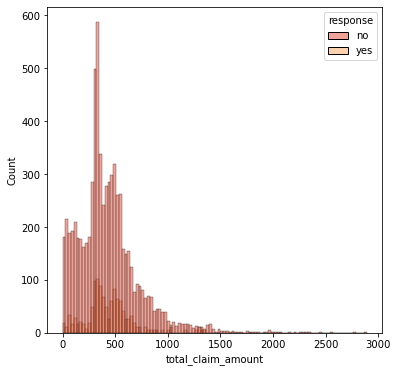

In [ ]:
fig.ax = plt.subplots(figsize = (6,6))
sns.histplot(x="total_claim_amount", data=df, hue="response")

In [ ]:
## create buckets for total claim amount
df.total_claim_amount.describe()

count    8355.000000
mean      432.444464
std       287.688745
min         0.099007
25%       272.920158
50%       383.363758
75%       547.200000
max      2893.239678
Name: total_claim_amount, dtype: float64

In [ ]:
# Check bin range and count of binned values
df.total_claim_amount.value_counts(sort = False, bins = 20)

(-2.795, 144.756]       1176
(144.756, 289.413]      1063
(289.413, 434.07]       2543
(434.07, 578.727]       1809
(578.727, 723.384]       768
(723.384, 868.041]       419
(868.041, 1012.698]      239
(1012.698, 1157.355]     106
(1157.355, 1302.012]      95
(1302.012, 1446.669]      72
(1446.669, 1591.326]      22
(1591.326, 1735.983]       8
(1735.983, 1880.64]        9
(1880.64, 2025.297]        9
(2025.297, 2169.955]       6
(2169.955, 2314.612]       5
(2314.612, 2459.269]       3
(2459.269, 2603.926]       1
(2603.926, 2748.583]       0
(2748.583, 2893.24]        2
Name: total_claim_amount, dtype: int64

In [ ]:
## asign binned values of total claim amount to a new column
df['total_claim_amount_binned'] = pd.cut(df['total_claim_amount'],20)
df.total_claim_amount_binned.to_frame()

,total_claim_amount_binned
0,"(723.384, 868.041]"
1,"(434.07, 578.727]"
2,"(434.07, 578.727]"
3,"(144.756, 289.413]"
4,"(144.756, 289.413]"
...,...
8350,"(289.413, 434.07]"
8351,"(868.041, 1012.698]"
8352,"(144.756, 289.413]"
8353,"(289.413, 434.07]"


In [ ]:
claim_response = df.groupby(["total_claim_amount_binned","response"])["response"].count().rename("total_claim_amount")
claim_response = claim_response / claim_response.groupby(level=0).sum() #*100 if answer should be in percent
claim_response = pd.DataFrame(claim_response).reset_index()
claim_response

,total_claim_amount_binned,response,total_claim_amount
0,"(-2.794, 144.756]",no,0.907313
1,"(-2.794, 144.756]",yes,0.092687
2,"(144.756, 289.413]",no,0.893697
3,"(144.756, 289.413]",yes,0.106303
4,"(289.413, 434.07]",no,0.831302
5,"(289.413, 434.07]",yes,0.168698
6,"(434.07, 578.727]",no,0.820343
7,"(434.07, 578.727]",yes,0.179657
8,"(578.727, 723.384]",no,0.850260
9,"(578.727, 723.384]",yes,0.149740


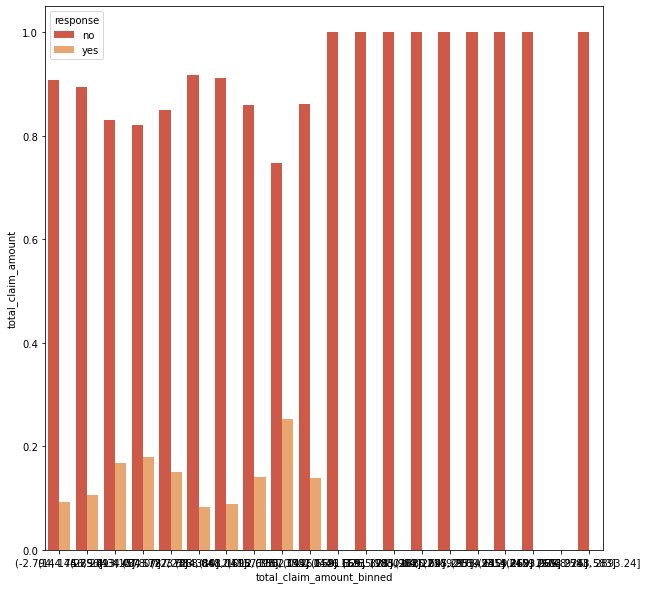

In [ ]:
sns.set_palette("RdYlGn")
fig.ax = plt.subplots(figsize = (10,10))
sns.barplot(x="total_claim_amount_binned", y="total_claim_amount", data=claim_response, hue="response")
ax.set_title("Response rate by claim_response")
ax.xaxis.set(ticks=[0,500,1000,1500,2000,2500,3000], ticklabels=[0,500,1000,1500,2000,2500,3000])
#ax.tick_params(axis='y', direction = "inout",length=10)
plt.show()

- Show a plot of the response rate by income.


<AxesSubplot:xlabel='income', ylabel='Count'>

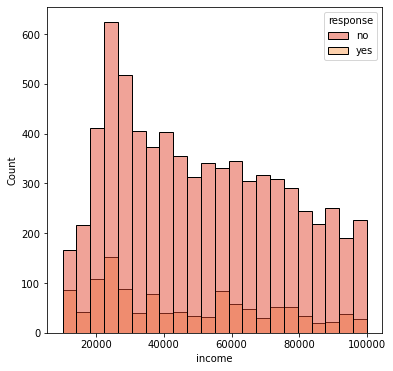

In [ ]:
fig.ax = plt.subplots(figsize = (6,6))
sns.histplot(x="income", data=df, hue="response")

- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.


- Plot the Correlation Heatmap.


In [ ]:
df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.009872,0.393278,0.009680,0.002006,-0.043072,0.025267,0.223867
income,0.009872,1.000000,-0.007925,-0.021658,0.011208,0.000424,-0.004712,-0.143412
monthly_premium_auto,0.393278,-0.007925,1.000000,0.005234,0.018808,-0.017634,-0.004937,0.630157
months_since_last_claim,0.009680,-0.021658,0.005234,1.000000,-0.047643,0.008990,0.010774,0.006655
months_since_policy_inception,0.002006,0.011208,0.018808,-0.047643,1.000000,-0.004338,-0.013075,0.000826
number_of_open_complaints,-0.043072,0.000424,-0.017634,0.008990,-0.004338,1.000000,-0.001873,-0.015844
number_of_policies,0.025267,-0.004712,-0.004937,0.010774,-0.013075,-0.001873,1.000000,0.000710
total_claim_amount,0.223867,-0.143412,0.630157,0.006655,0.000826,-0.015844,0.000710,1.000000


<AxesSubplot:>

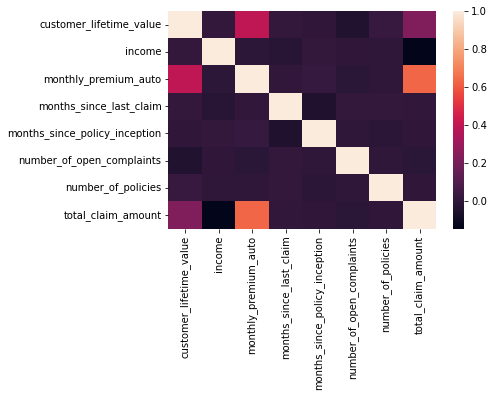

In [ ]:
sns.heatmap(df.corr())

- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

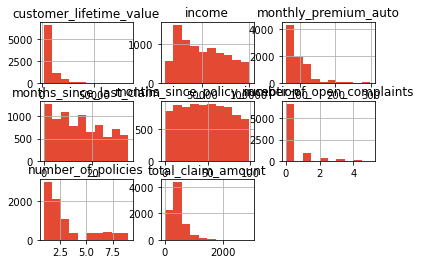

In [ ]:
df.hist()

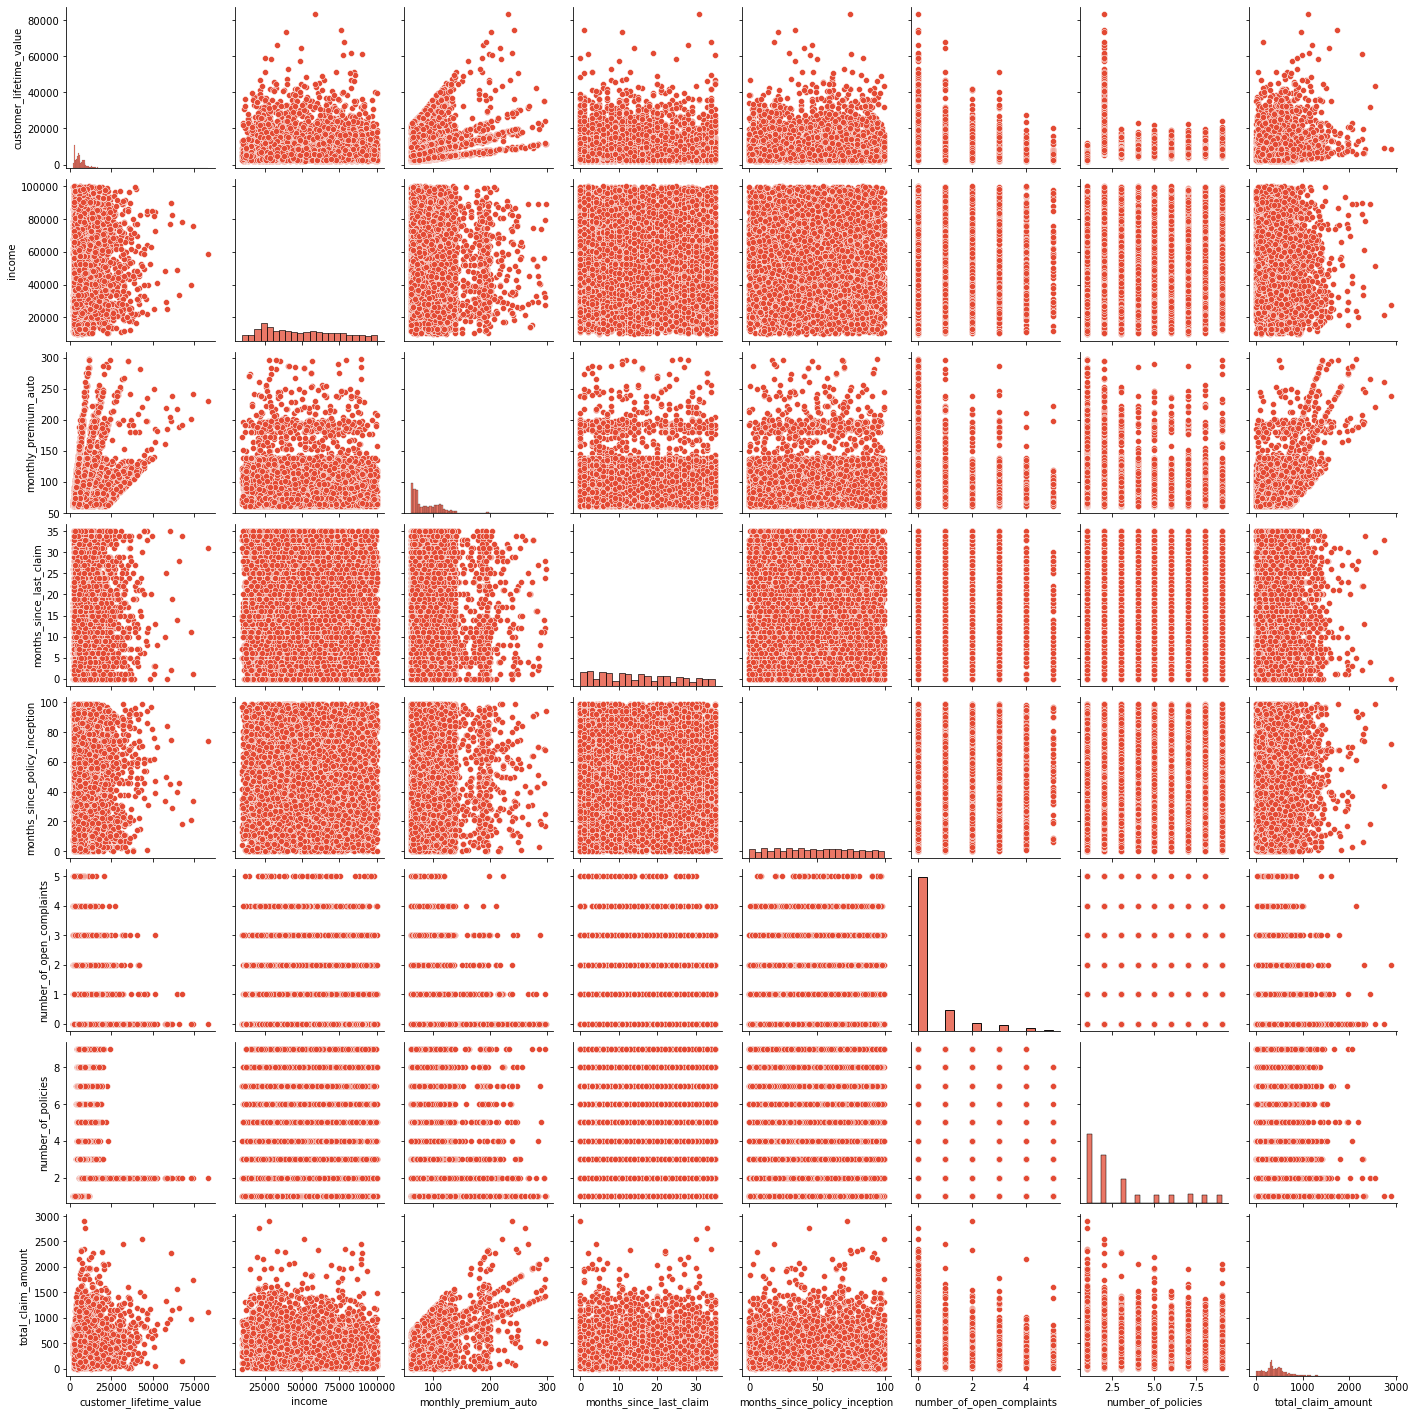

In [ ]:
sns.pairplot(df)

### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          8355 non-null   object  
 1   customer_lifetime_value        8355 non-null   float64 
 2   response                       8355 non-null   object  
 3   coverage                       8355 non-null   object  
 4   education                      8355 non-null   object  
 5   effective_to_date              8355 non-null   object  
 6   employmentstatus               8355 non-null   object  
 7   gender                         8355 non-null   object  
 8   income                         8355 non-null   int64   
 9   location_code                  8355 non-null   object  
 10  marital_status                 8355 non-null   object  
 11  monthly_premium_auto           8355 non-null   int64   
 12  months_since_last_claim        835

In [ ]:
numerical = df.select_dtypes([float,int])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2228.525238,22139,64,3.0,26,0.0,1,744.924331
1,14947.917300,22139,100,34.0,31,0.0,2,480.000000
2,22332.439460,49078,97,10.0,3,0.0,2,484.013411
3,5035.035257,37405,63,8.0,99,3.0,4,287.556107
4,4956.247235,87197,63,35.0,45,0.0,3,247.402353
...,...,...,...,...,...,...,...,...
8350,2771.663013,59855,74,30.0,82,4.0,1,355.200000
8351,19228.463620,61146,187,14.0,32,0.0,2,897.600000
8352,5259.444853,61146,65,7.0,68,0.0,6,273.018929
8353,23893.304100,39837,201,11.0,63,0.0,2,381.306996


In [ ]:
categoricals = df.select_dtypes([object])
categoricals = categoricals.drop(columns=['effective_to_date','state'])
categoricals

,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region
0,no,basic,college,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize,west region
1,no,basic,bachelor,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize,east
2,yes,extended,college,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,north west
3,no,basic,doctor,employed,f,urban,married,corporate auto,corporate l2,offer2,branch,four-door car,medsize,west region
4,no,basic,high school or below,employed,m,urban,single,personal auto,personal l2,offer2,branch,two-door car,medsize,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,no,basic,college,employed,m,suburban,married,personal auto,personal l2,offer2,branch,two-door car,medsize,central
8351,no,basic,high school or below,unemployed,m,suburban,single,personal auto,personal l2,offer1,branch,luxury suv,medsize,central
8352,no,basic,college,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize,north west
8353,no,extended,bachelor,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,central


- Now we will try to check the normality of the numerical variables visually


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

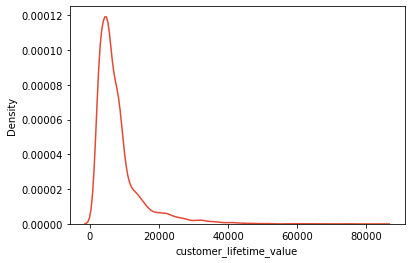

In [ ]:
sns.kdeplot(df['customer_lifetime_value'])

  - Use seaborn library to construct distribution plots for the numerical variables


In [ ]:
df_2 = pd.concat([numerical,categoricals.policy] ,axis=1)
df_2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,policy
0,2228.525238,22139,64,3.0,26,0.0,1,744.924331,personal l3
1,14947.917300,22139,100,34.0,31,0.0,2,480.000000,personal l3
2,22332.439460,49078,97,10.0,3,0.0,2,484.013411,corporate l3
3,5035.035257,37405,63,8.0,99,3.0,4,287.556107,corporate l2
4,4956.247235,87197,63,35.0,45,0.0,3,247.402353,personal l2
...,...,...,...,...,...,...,...,...,...
8350,2771.663013,59855,74,30.0,82,4.0,1,355.200000,personal l2
8351,19228.463620,61146,187,14.0,32,0.0,2,897.600000,personal l2
8352,5259.444853,61146,65,7.0,68,0.0,6,273.018929,personal l3
8353,23893.304100,39837,201,11.0,63,0.0,2,381.306996,corporate l3


In [ ]:
df_melt = df_2.melt(id_vars = 'policy')
df_melt

,policy,variable,value
0,personal l3,customer_lifetime_value,2228.525238
1,personal l3,customer_lifetime_value,14947.917300
2,corporate l3,customer_lifetime_value,22332.439460
3,corporate l2,customer_lifetime_value,5035.035257
4,personal l2,customer_lifetime_value,4956.247235
...,...,...,...
66835,personal l2,total_claim_amount,355.200000
66836,personal l2,total_claim_amount,897.600000
66837,personal l3,total_claim_amount,273.018929
66838,corporate l3,total_claim_amount,381.306996


In [ ]:
# g = sns.FacetGrid(df, col='cols', hue="target", palette="Set1")
# g = (g.map(sns.distplot, "vals", hist=False, rug=True))

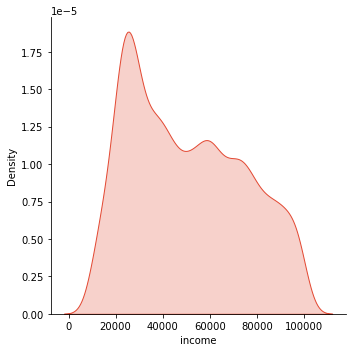

In [ ]:
sns.displot(
    data=numerical, 
    x='income', 
    #hue='region', 
    kind='kde', 
    fill=True,
    #col='variable'
)

In [ ]:
#sns.displot(numerical,kde=False,color='b')

  - Use Matplotlib to construct histograms


  - Do the distributions for different numerical variables look like a normal distribution 


- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

## Activity 6

  

 #### X-y split.
  

In [ ]:
# separate x and y
#x = df.drop('total_claim_amount',axis=1)
x = df.drop(columns=['total_claim_amount','number_of_open_complaints','number_of_policies'],axis=1)
y = df.total_claim_amount 

 #### Normalize (numerical).
  

In [ ]:
# get only numeric
x_num=x._get_numeric_data()

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:>]], dtype=object)

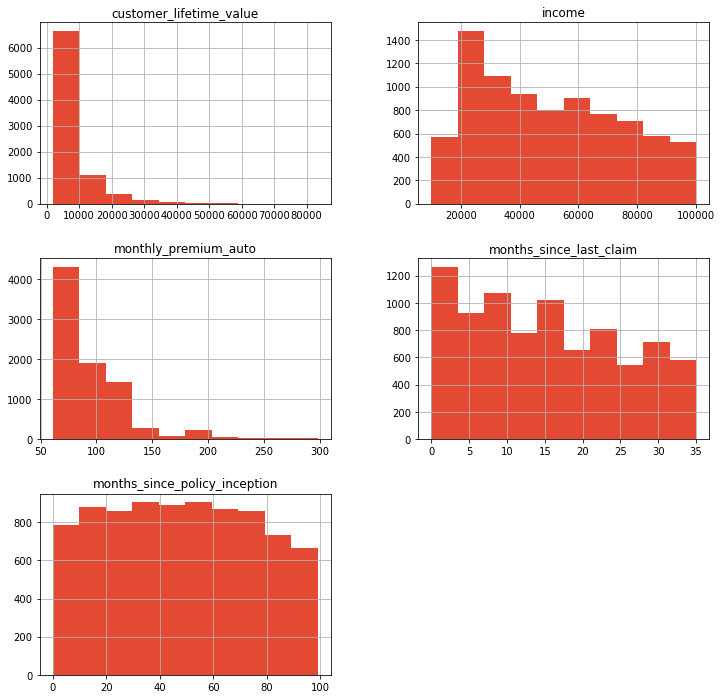

In [ ]:
x_num.hist(figsize=(12,12))

In [ ]:
# normalize with standard Scaler
x_standard_scaled=StandardScaler().fit_transform(x_num)
x_standard_scaled.shape

(8355, 5)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

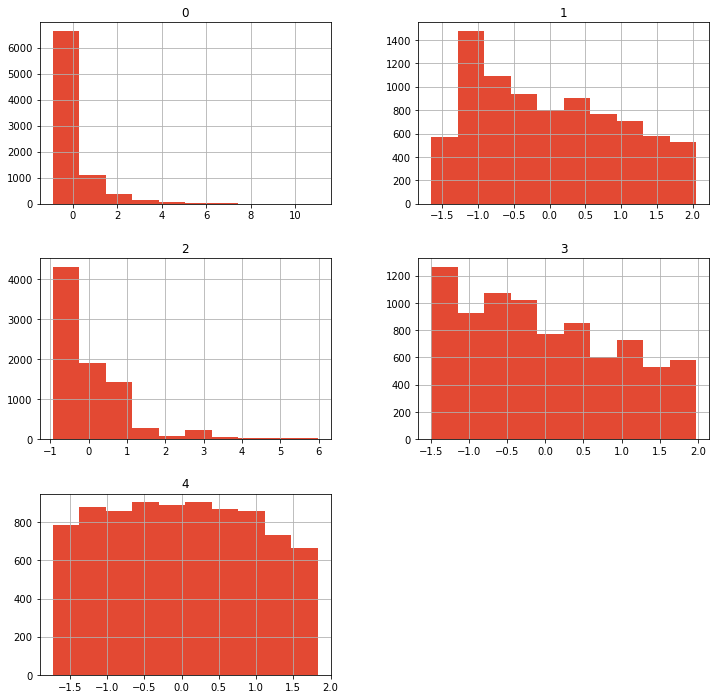

In [ ]:
pd.DataFrame(x_standard_scaled).hist(figsize=(12,12))

In [ ]:
# Standardize using Power Transformer
x_power_trans = PowerTransformer().fit_transform(x_num)
x_power_trans.shape

(8355, 5)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

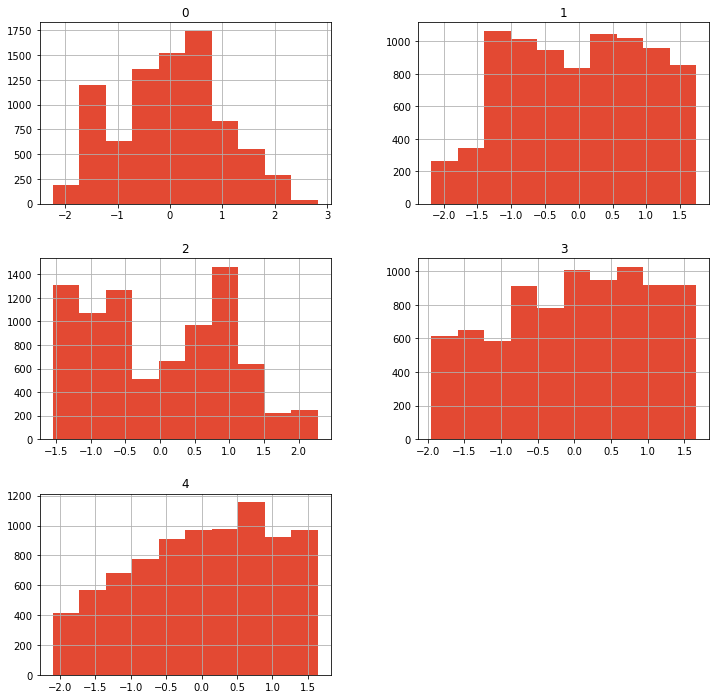

In [ ]:
pd.DataFrame(x_power_trans).hist(figsize=(12,12))

### One Hot/Label Encoding (categorical).


In [ ]:
catecoricals_dummies = pd.get_dummies(categoricals, drop_first=True)
catecoricals_dummies

,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,...,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,region_east,region_north west,region_west region
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
8351,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8352,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8353,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
categoricals.columns

Index(['response', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'region'],
      dtype='object')

In [ ]:
list_cat = []
for i in categoricals.columns:
    list_cat.append(list(categoricals.loc[:,i].unique()))
list_cat


[['no', 'yes'],
 ['basic', 'extended', 'premium'],
 ['college', 'bachelor', 'doctor', 'high school or below', 'master'],
 ['unemployed', 'employed', 'disabled', 'medical leave', 'retired'],
 ['f', 'm'],
 ['suburban', 'urban', 'rural'],
 ['single', 'married', 'divorced'],
 ['personal auto', 'corporate auto', 'special auto'],
 ['personal l3',
  'corporate l3',
  'corporate l2',
  'personal l2',
  'personal l1',
  'corporate l1',
  'special l2',
  'special l3',
  'special l1'],
 ['offer4', 'offer3', 'offer2', 'offer1'],
 ['call center', 'branch', 'agent', 'web'],
 ['four-door car',
  'suv',
  'two-door car',
  'sports car',
  'luxury car',
  'luxury suv'],
 ['medsize', 'small', 'large'],
 ['west region', 'east', 'north west', 'central']]

In [ ]:
Ordinal_Cats = [['no','yes'],
['basic','extended','premium'],
['high school or below','college','bachelor','master','doctor'],
['unemployed','employed','disabled','medical leave','retired'],
['f','m'],
['urban','suburban','rural'],
['single','married','divorced'],
['personal auto', 'corporate auto', 'special auto'], 
['personal l1','personal l2', 'personal l3',      'corporate l1',  'corporate l2', 'corporate l3', 'special l1', 'special l2',  'special l3' ], 
['offer4', 'offer3', 'offer2', 'offer1'], 
['call center', 'branch', 'agent', 'web'], 
['four-door car',  'suv',  'two-door car',  'sports car',  'luxury car',  'luxury suv'],
['medsize', 'small', 'large'], 
['west region', 'east', 'north west', 'central']]
 
#Ordinal_Cats


In [ ]:
categoricals_Ordinal = pd.DataFrame(OrdinalEncoder(categories = Ordinal_Cats).fit_transform(categoricals), columns = categoricals.columns)
categoricals_Ordinal

,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,1.0,0.0,0.0,2.0
3,0.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,3.0
8351,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,5.0,0.0,3.0
8352,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0
8353,0.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,5.0,3.0,3.0,5.0,0.0,3.0


### Activity 7


#### Linear Regression



    Train-test split.


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x_standard_scaled, y, test_size=.20)

    Apply linear regression.


In [ ]:
model=LinearRegression()    # model
model.fit(X_train, y_train)   # model train

LinearRegression()

    Model Interpretation.



In [ ]:
model.coef_


array([ -8.68249023, -39.65081117, 181.13664513,  -0.35651796,
        -1.7613011 ])

In [ ]:
model.intercept_

433.3740600777495

In [ ]:
y_pred = model.predict(X_test)   # model prediction

Text(0.5, 1.0, 'Test Set Residual histogram')

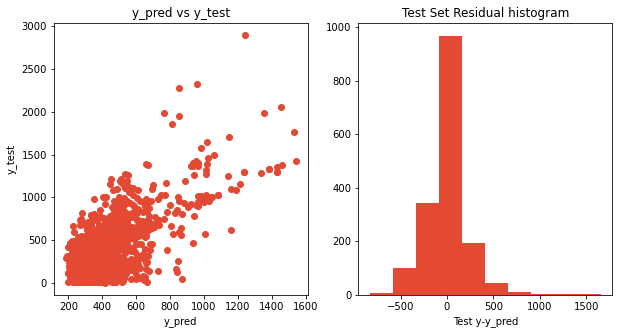

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(y_pred,y_test, 'o')
ax[0].set_xlabel('y_pred')
ax[0].set_ylabel('y_test')
ax[0].set_title('y_pred vs y_test')

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

In [ ]:
# Score this model - R²
model.score(X_test,y_test)

0.45740361375057215

### Using statsmodels

In [ ]:
X_train_stats = sm.add_constant(X_train) # adding a constant
model_stats = sm.OLS(y_train, X_train_stats).fit()
predictions_stats = model_stats.predict(X_train_stats) 
print_model_stats = model_stats.summary()
print(print_model_stats)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     912.4
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:11:47   Log-Likelihood:                -45543.
No. Observations:                6684   AIC:                         9.110e+04
Df Residuals:                    6678   BIC:                         9.114e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.3741      2.696    160.771      0.0

Text(0.5, 1.0, 'Test Set Residual histogram')

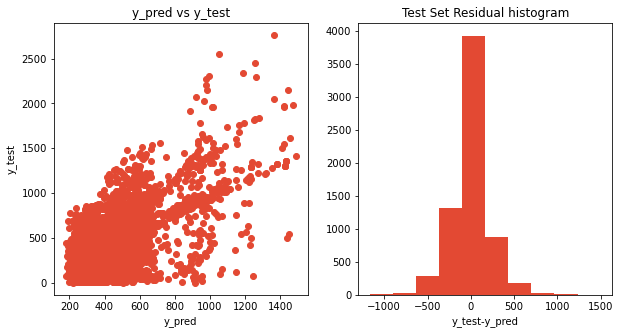

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(predictions_stats,y_train, 'o')
ax[0].set_xlabel('y_pred')
ax[0].set_ylabel('y_test')
ax[0].set_title('y_pred vs y_test')

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_train - predictions_stats)
ax[1].set_xlabel("y_test-y_pred")
ax[1].set_title("Test Set Residual histogram")

### Model Validation



#### Description:



In [ ]:
# ME: mean error
ME = np.mean( y_test - y_pred )

# MAE: mean absolute error
MAE = np.mean( np.abs(  y_test - y_pred ) )

# MSE: mean squared error
MSE = np.mean( np.power(  y_test - y_pred , 2 ) )

# RMSE: root mean squared error
RMSE = np.sqrt(MSE)

# MAPE: mean absolute percentual error
MAPE = np.mean( np.abs(  y_test - y_pred) / y_test ) 

In [ ]:
MSE

47257.734989369266

In [ ]:
RMSE

217.38844263062668

In [ ]:
MAE

146.41897384540817

In [ ]:
MAPE

1.9068956183448702

   R2.


# Test multi variable

In [ ]:
# x = x_num
# x_multi_x = np.hstack([x,x**2,x**3,x**4,x**5])
# x_multi_x.shape

In [ ]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x_num)

PolynomialFeatures(include_bias=False)

In [ ]:
x_ = transformer.transform(x_num)

In [ ]:
x_multi_x=StandardScaler().fit_transform(x_)
x_multi_x.shape


(8355, 20)

In [ ]:
X_tr, X_te, y_tr, y_te=train_test_split(x_multi_x, y, test_size=.20)

In [ ]:
model=LinearRegression()    # model
model.fit(X_tr, y_tr)   # model train

LinearRegression()

In [ ]:
model.coef_


array([-11.61282509, -76.64185838, 164.22923192, -21.90985903,
       -10.56432851,  38.29305787,  -0.44290221, -42.65395847,
        -3.86342775,   5.07311977,  56.61599206, -36.04384087,
         9.85024698,   6.16756505,  57.98736369,   9.59110771,
        -3.20276262,   3.14967856,   4.9202982 ,  -0.21643451])

In [ ]:
model.intercept_

433.00844320813377

In [ ]:
y_pr=model.predict(X_te)   # model prediction

Text(0.5, 1.0, 'Test Set Residual histogram')

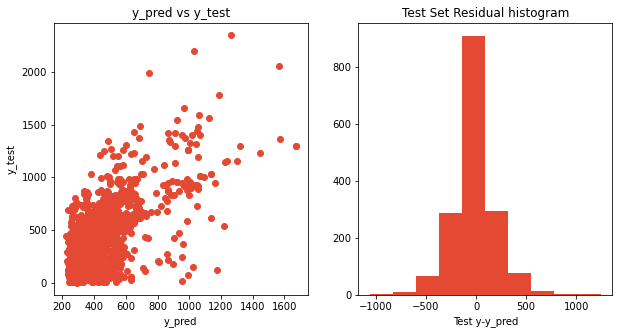

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(y_pr,y_te, 'o')
ax[0].set_xlabel('y_pred')
ax[0].set_ylabel('y_test')
ax[0].set_title('y_pred vs y_test')

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_te - y_pr)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

In [ ]:
model.score(X_te,y_te)

0.41074211000816907

In [ ]:
x = x_num
x_multi_x = np.hstack([x,x**2,x**3,np.exp(-x)])
x_multi_x.shape

(8355, 20)

In [ ]:
x_multi_x=StandardScaler().fit_transform(x_multi_x)
x_multi_x.shape


(8355, 20)

In [ ]:
X_tr, X_te, y_tr, y_te=train_test_split(x_multi_x, y, test_size=.20)

In [ ]:
model=LinearRegression()    # model
model.fit(X_tr, y_tr)   # model train

LinearRegression()

In [ ]:
model.coef_


array([-3.36541300e+01, -1.12895913e+02,  1.14640687e+02, -9.08109429e+01,
        1.48503840e+01,  4.07569352e+01,  8.87136225e+01,  1.08260486e+02,
        1.96959747e+02, -4.96055784e+01, -1.38044651e+01, -1.22898012e+01,
       -4.26366136e+01, -1.17277620e+02,  3.44401324e+01, -1.42108547e-13,
       -2.55795385e-13, -2.96427132e+00, -1.22863036e+01,  2.04874383e+00])

In [ ]:
model.intercept_

431.75498529247517

In [ ]:
y_pr=model.predict(X_te)   # model prediction

Text(0.5, 1.0, 'Test Set Residual histogram')

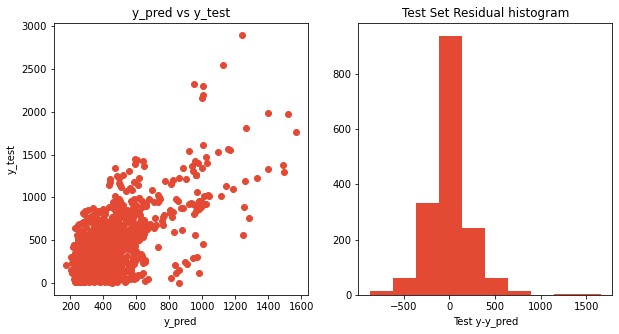

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(y_pr,y_te, 'o')
ax[0].set_xlabel('y_pred')
ax[0].set_ylabel('y_test')
ax[0].set_title('y_pred vs y_test')

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_te - y_pr)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

In [ ]:
model.score(X_te,y_te)

0.4238817936036732